In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('/content/drive/MyDrive/ESAA/방학플젝/dataSP25.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA/방학플젝/compSP25.csv')

In [ ]:
print(train.shape)
print(test.shape)

(27379, 16)
(6847, 15)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27379 entries, 0 to 27378
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27379 non-null  int64  
 1   name                            27370 non-null  object 
 2   host_id                         27379 non-null  int64  
 3   host_name                       27369 non-null  object 
 4   neighbourhood_group             27379 non-null  object 
 5   neighbourhood                   27379 non-null  object 
 6   latitude                        27379 non-null  float64
 7   longitude                       27379 non-null  float64
 8   room_type                       27379 non-null  object 
 9   price                           27379 non-null  int64  
 10  minimum_nights                  27379 non-null  int64  
 11  number_of_reviews               27379 non-null  int64  
 12  last_review                     

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6847 non-null   int64  
 1   name                            6847 non-null   object 
 2   host_id                         6847 non-null   int64  
 3   host_name                       6843 non-null   object 
 4   neighbourhood_group             6847 non-null   object 
 5   neighbourhood                   6847 non-null   object 
 6   latitude                        6847 non-null   float64
 7   longitude                       6847 non-null   float64
 8   room_type                       6847 non-null   object 
 9   minimum_nights                  6847 non-null   int64  
 10  number_of_reviews               6847 non-null   int64  
 11  last_review                     5472 non-null   object 
 12  reviews_per_month               54

## 전처리 수행 변수 : longitude, number_of_reviews, availability_365

### 1. longitude

In [ ]:
train['longitude'].isnull().sum()

0

In [ ]:
# 경도의 범위 설정 (서경 74° 00′를 기준으로 설정)
min_longitude = -74.25
max_longitude = -73.7

# 범위를 벗어나는 데이터 확인
out_of_range_longitudes = train[(train['longitude'] < min_longitude) | (train['longitude'] > max_longitude)]

# 결과 출력
if not out_of_range_longitudes.empty:
    print(f"There are {len(out_of_range_longitudes)} rows where 'longitude' is out of range.")
    print(out_of_range_longitudes[['latitude', 'longitude']])
else:
    print("All 'longitude' values are within the expected range.")

All 'longitude' values are within the expected range.


뉴욕주가 북위 40° 43′ (40.7167°), 서경 74° 00′ (-74.0°)인데 train 데이터 중에서 해당 범위를 벗어난 데이터가 있는지(뉴욕주가 아닌 다른 곳에 위치한 이상치) 확인하는 코드

→ 벗어나는 이상치는 없는 것으로 확인(위도는 따로 안 살펴봤는데 살펴보고 싶으면 경도를 위도로 바꾸고 범위 조절하면 될 듯)

In [ ]:
import folium

# 지도 초기화 (중심을 데이터의 평균 위도와 경도로 설정)
center_lat = train['latitude'].mean()
center_lon = train['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# 데이터포인트 추가
for _, row in train.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,  # 점 크기
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Jupyter Notebook에서 지도 표시
m

Output hidden; open in https://colab.research.google.com to view.

위도, 경도 이용해서 지도에 표시 한 번 해봤어욤

### 2. number_of_reviews

In [ ]:
train['number_of_reviews'].isnull().sum()

0

In [ ]:
train['number_of_reviews'].max()

607

In [ ]:
train['number_of_reviews'].min()

0

<Axes: xlabel='number_of_reviews', ylabel='Count'>

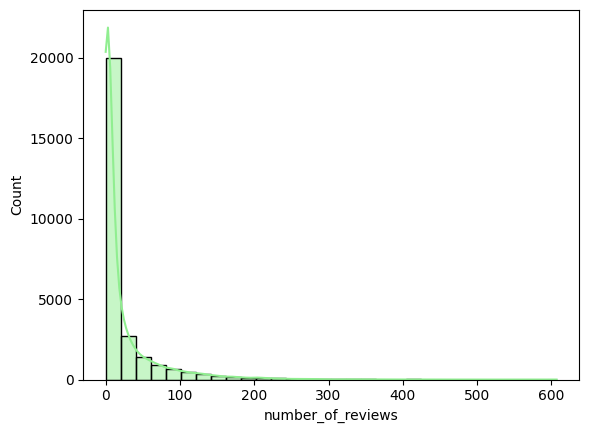

In [ ]:
sns.histplot(train['number_of_reviews'], bins=30, kde=True, color='lightgreen')

- 결측치 없음

- 0~607개 사이의 범위에서 리뷰 존재

- 확실히 리뷰가 적은 곳이 많고 리뷰 수가 많은 에어비앤비 수가 적어짐

대도시일수록 리뷰 수가 많아지는지 궁금함 → neighbourhood_group이랑 number_of_reviews의 관계 살펴보기



### 3. availability_365

<Axes: xlabel='availability_365', ylabel='Count'>

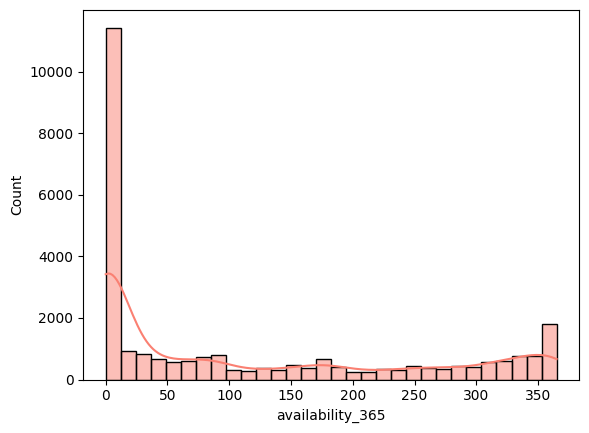

In [ ]:
sns.histplot(train['availability_365'], bins=30, kde=True, color='salmon')

In [ ]:
train[train['availability_365'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Clinton Hill Apartment Single Bedroom ! Pratt ~~,30610258,Santiago,Brooklyn,Clinton Hill,40.69591,-73.96284,Private room,58,2,1,9/23/2018,0.10,1,0
3,4,15 min train ride to Times Sq and US OPEN,101602599,M,Queens,Woodside,40.74340,-73.90588,Entire home/apt,50,1,95,6/24/2019,5.63,2,0
20,21,1 bedroom/1 Bath/Balcony/Wash-Dryer,42320409,Timothy,Brooklyn,Williamsburg,40.70760,-73.94072,Entire home/apt,87,1,3,10/24/2015,0.07,1,0
22,23,Charming room Chinatown Manhattan,45951143,Alexandra,Manhattan,Chinatown,40.71319,-73.99265,Private room,100,1,1,10/13/2015,0.02,1,0
25,26,Two Bedroom on the Upper East Side,80593607,Theodore,Manhattan,Upper East Side,40.77788,-73.95615,Entire home/apt,105,1,3,8/23/2016,0.08,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27367,27368,Great little spot,164048400,Jarryd,Brooklyn,Bushwick,40.70167,-73.93075,Private room,40,1,1,12/30/2017,0.05,1,0
27370,27371,Modern 1 Bedroom In Vibrant BK Neighborhood,10218689,Bere,Brooklyn,Crown Heights,40.67088,-73.95128,Entire home/apt,90,4,26,6/19/2019,2.85,1,0
27372,27373,Bedroom on Quiet Block on the Lower East Side,29111684,Samuel,Manhattan,Lower East Side,40.72167,-73.99075,Private room,85,30,2,3/20/2017,0.06,1,0
27374,27375,Dream home: Beautiful 2B2B Condo in Chelsea,106627653,Jacob,Manhattan,Chelsea,40.74735,-73.99974,Entire home/apt,585,3,7,8/4/2018,0.23,1,0


In [ ]:
len(train[train['availability_365'] == 0])

9746

이용 가능한 일수가 0인 데이터 즉, 이용 불가능한 에어비앤비에 대한 데이터가 9746개로 꽤나 많음.. 왜지..ㅠㅠ

In [ ]:
len(train[(train['availability_365'] == 0) & (train['number_of_reviews'] != 0)])

7089

In [ ]:
len(train[(train['availability_365'] == 0) & (train['number_of_reviews'] == 0)])

2657

일단 이용 횟수랑 연관 되어 보이는 리뷰 갯수(number_of_reviews)와 비교했을때 리뷰 갯수는 있지만 이용 가능 횟수(availability_365)가 0인 데이터가 7089개 있음 → 확실한 이상치 하지만 어떻게 채우지...? 일단 생각해본건 리뷰 횟수로 대체하기

## EDA 주제

1. 대도시일수록 리뷰 수가 많아지는지 궁금함 → neighbourhood_group이랑 number_of_reviews의 관계 살펴보기

2. 위도,경도로 위치 분류 후 평균 가격 비교와 지역구별로 분류 후 평균 가격 비교가 동일한지 → 이걸 통해 지역구와 위도,경도 사이에 잘못 연결된 값이 있는지 없는지 확인할 수도 있고 지역구 별로 어디가 비싸고 싼지 파악 가능할 듯?!

3. room_type에 따른 availability_365 -> 이상치로 판단 되는 데이터 제거하고 관계 분석해서 이상치 처리도 될듯?!?!?

#### room_type에 따른 availability_365

In [ ]:
# 1. availability_365가 0인 데이터와 아닌 데이터를 분리
df_zero_avail = train[train['availability_365'] == 0]  # 제외할 데이터
df_non_zero_avail = train[train['availability_365'] > 0]  # 분석할 데이터

# 2. room_type별 availability_365 평균 계산
room_type_avg = df_non_zero_avail.groupby('room_type')['availability_365'].mean()

# 3. availability_365가 0인 데이터의 값을 room_type별 평균으로 대체
df_zero_avail['availability_365'] = df_zero_avail['room_type'].map(room_type_avg)

# 4. 수정된 데이터 병합
train_updated = pd.concat([df_non_zero_avail, df_zero_avail], ignore_index=True)

# 결과 출력
print("Room type별 평균 availability_365:")
print(room_type_avg)
print("\n대체 후 데이터프레임:")
print(train_updated)

Room type별 평균 availability_365:
room_type
Entire home/apt    173.094382
Private room       177.211069
Shared room        216.914761
Name: availability_365, dtype: float64

대체 후 데이터프레임:
          id                                               name    host_id  \
0          2                                      Andy Phillips    6180052   
1          3   Stylish, Comfortable, and Affordable in Brooklyn    5957027   
2          5  Sunny 2 bdrm Park Slope Apt w/ Yard 3min to Su...  106168581   
3          6                Private Sunny Cool Bushwick Bedroom      94946   
4          7        Spacious & Modern Room in a Prime Location!  215532980   
...      ...                                                ...        ...   
27374  27368                                  Great little spot  164048400   
27375  27371        Modern 1 Bedroom In Vibrant BK Neighborhood   10218689   
27376  27373      Bedroom on Quiet Block on the Lower East Side   29111684   
27377  27375        Dream home: Bea

<ipython-input-18-0e1f4ac37881>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zero_avail['availability_365'] = df_zero_avail['room_type'].map(room_type_avg)
